In [76]:
import pymongo
import time
import matplotlib.pyplot as plt
import re
import string
import nltk
import wordcloud
import random
from sklearn.feature_extraction.text import CountVectorizer
from time import perf_counter_ns
import sys
import pandas as pd
from pprint import pprint

In [77]:
# Create connection to database.
class Database:
    def __init__(self, db_addr):
        self.db_addr = db_addr

    def connect(self):
        self.conn=self.db_addr
        self.client=pymongo.MongoClient(self.conn)
        try:
            print(f"Connection to MongoDB Version {self.client.server_info()['version']} successful.")
        except Exception:
            print("Unable to connect to the server.")
        # Create/Connect to Database
        self.db=self.client["Job_Boards"]
        # Create/Connect to Collection/Table
        return self.db["job_listings"]

In [78]:
db = Database("mongodb://localhost:27017").connect()

Connection to MongoDB Version 5.0.3 successful.


In [79]:
descriptions = (desc['job_description'] for desc in db.find() if desc['job_title'] == 'Data Analyst')

In [80]:
descriptions = ("".join(char for char in job if char not in string.punctuation) for job in (job for job in descriptions))
#next(descriptions)

In [81]:
descriptions = ((word.lower() for word in desc if word != '') for desc in (re.split('\W', desc) for desc in descriptions))

In [82]:
stopwords = nltk.corpus.stopwords.words('english')
drop_words = {"full", "time", "work", "experience", "the", "use", "include", "service", 
              "year", "would", "yield", "years", "within", "worldwide", "working", "well", "valuable", "toolkit",
             "business", "skills"}

In [83]:
descriptions = ((word for word in desc if word not in stopwords and word 
                not in drop_words) for desc in (desc for desc in descriptions))

In [84]:
word_count = {}
size_of_total = 0
size_of = 0
start_time = perf_counter_ns()
for desc in descriptions:
    new = sys.getsizeof(desc)
    size_of_total += new
    if new > size_of:
        size_of = new
    for word in desc:
        if word in word_count.keys():
            word_count[word] += 1
        else:
            word_count[word] = 1
with open('word_count.py', 'w') as handle:
    handle.write(f"word_count={word_count}")
finish_time = perf_counter_ns()
total_time = finish_time - start_time
print(f"seconds: {total_time/1000000000}")
print(size_of_total)
print(size_of)
print(len(word_count))

seconds: 2.376211947
112000
112
14447


In [85]:
wordcloud = wordcloud.WordCloud(width=1000, height=600, background_color='white', min_font_size=15).generate_from_frequencies(word_count)

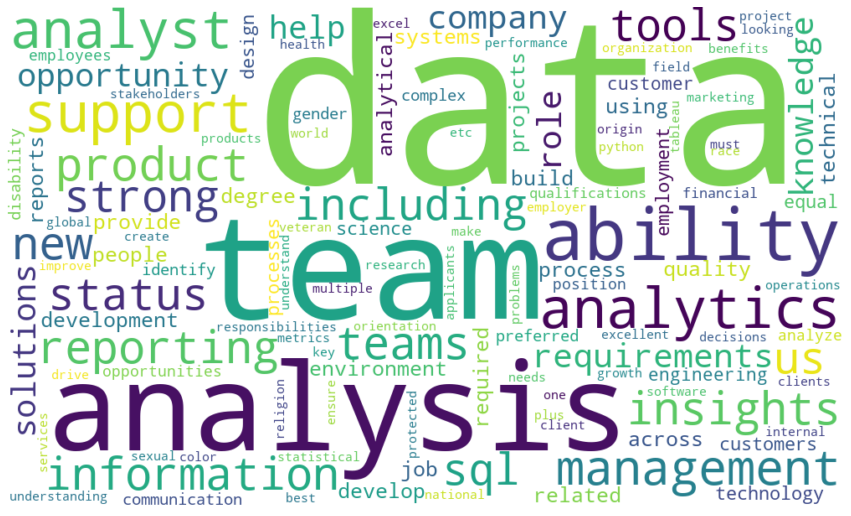

In [86]:
plt.figure(figsize=(15,17))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()